# Filtro Butterworth a partir de especificaciones

Importamos las librerias numpy, matplotlib y scipy. "numpy" se utiliza para manipular arreglos numéricos, "matplotlib.pyplot" se utiliza para crear gráficos y visualizaciones y "scipy.signal" se utiliza para el procesamiento y análisis de datos de señales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

/opt/homebrew/Caskroom/miniconda/base/envs/sys_itba/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Pedimos los parámetros para el diseño del filtro pasabajos Butterworth. Solicitamos al usuario que ingrese cuatro valores numéricos y los almacene en variables llamadas alphas (atenuación de la banda de stop), omegas (frecuencia de la banda de stop), alphap (atenuación de la banda de pass) y omegap (frecuencia de la banda de pass).



In [2]:
alphas = 20
omegas = 30
alphap = 2
omegap = 10

print('El valor de la atenuación de rechazabanda es de',alphas,'dB')
print('El valor de la frecuencia de rechazabanda es de',omegas,'rad/s')
print('El valor de la atenuación de pasabanda es de',alphap,'dB')
print('El valor de la frecuencia de pasabanda es de',omegap,'rad/s')

El valor de la atenuación de rechazabanda es de 20 dB
El valor de la frecuencia de rechazabanda es de 30 rad/s
El valor de la atenuación de pasabanda es de 2 dB
El valor de la frecuencia de pasabanda es de 10 rad/s


Calculamos a partir de los parámetros ingresados previamente el orden del filtro Butterworth (K) y la frecuencia de corte (omegac), frecuencia en la cuál observamos una atenuación de 3 decibeles (diagrama de bode).

In [3]:
K = np.ceil(np.log10((10**(alphas/10) - 1) / (10**(alphap/10) - 1)) / (2 * np.log10(omegas/omegap)))
omegac = (omegap / (10**(alphap/10) - 1)**(1/(2*K)) + omegas / (10**(alphas/10) - 1)**(1/(2*K))) / 2
deltas=10**(-alphas/20)
deltap=1-(10**(-alphap/20))

Luego, buscamos los polos para la función de transferencia y construimos la misma en las siguientes lineas de código. 

In [16]:
k = np.arange(1, K + 1)
p = 1j * omegac * np.exp(1j * np.pi / (2 * K) * (2 * k - 1)) # calculamos los polos para el filtro en base a la frecuencia de corte y el orden del filtro
A = np.poly(p) # calculamos los coeficientes del polinomio característico del filtro a partir de las raíces obtenidas 

omega_max = 100
omega = np.linspace(0, omega_max,1001) # creamos un conjunto de valores de frecuencia en el rango de 0 a 40
H = omegac**K / np.polyval(A, 1j * omega) # funcion de transferencia H 
print(H.shape)
HB = 20*np.log10(H) # calcula la respuesta del filtro en decibeles

(1001,)


A continuación queremos graficar la respuesta en magnitud de un filtro Butterworth. 

Para crear el espacio del grafico utilizamos la función plt.figure(). De querer establecer dimensiones de tamaño basta con agregar dentro del paréntesis figsize=(ancho, alto). 

En el eje horizontal ubicamos la frecuencia (omega) y en el vertical la magnitud de la respuesta del filtro (H). Con la función plt.xlabel() y plt.ylabel() agregamos las etiquetas correspondientes.

La función a graficar la ingresamos con la función plt.plot() donde dentro del paréntesis establecemos la variable horizontal, variable vertical y demás detalles del diseño.

Agregamos una línea horizontal punteada en 1/sqrt(2) como referencia para indicar el punto donde la magnitud de la respuesta del filtro alcanza la mitad de su valor máximo. 

Finalmente, con plt.show() imprimimos el gráfico

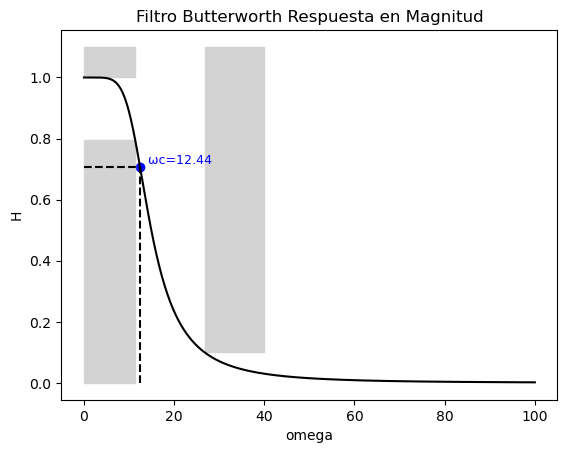

In [17]:
plt.figure()
plt.title("Filtro Butterworth Respuesta en Magnitud")
plt.xlabel("omega")
plt.ylabel("H")
plt.plot(omega, np.abs(H),color='black')

# mostramos el punto en el que la magnitud alcanza la mitad de su valor máximo
plt.scatter(omegac,(1/np.sqrt(2)), color='blue')
plt.plot([0,omegac],[(1/np.sqrt(2)),(1/np.sqrt(2))], linestyle='dashed', color='black')
plt.plot([omegac,omegac],[0,(1/np.sqrt(2))], linestyle='dashed', color='black')


omegalimitepaso = 0
for i in range(len(H)):
    if abs(abs(H[i]) - (1-deltap))<=0.002:
        omegalimitepaso = i
        
omegalimiterechazo = 0
for j in range(len(H)):
    if abs(abs(H[j]) - (deltas))<=0.002:
        omegalimiterechazo = j

plt.fill_between(omega, 0, (1-deltap), where=(omega >= 0) & (omega <= omega[omegalimitepaso]), color='lightgray')
plt.fill_between(omega, 1, 1.1, where=(omega >= 0) & (omega <= omega[omegalimitepaso]), color='lightgray')
plt.fill_between(omega, deltas, 1.1, where=(omega >= omega[omegalimiterechazo]) & (omega <= 40), color='lightgray')

plt.text(omegac, (1/np.sqrt(2)), '  \u03C9c=%.2f' % omegac, fontsize=9, color='blue', ha='left', va='bottom')

# mostramos el gráfico
plt.show()

Realizamos, siguiendo los pasos anteriores, el diagrama de Bode. Requerimos cambiar la escala del eje horizontal a una logarítmica por lo que utilizaremos la función plt.xscale() 

/opt/homebrew/Caskroom/miniconda/base/envs/sys_itba/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


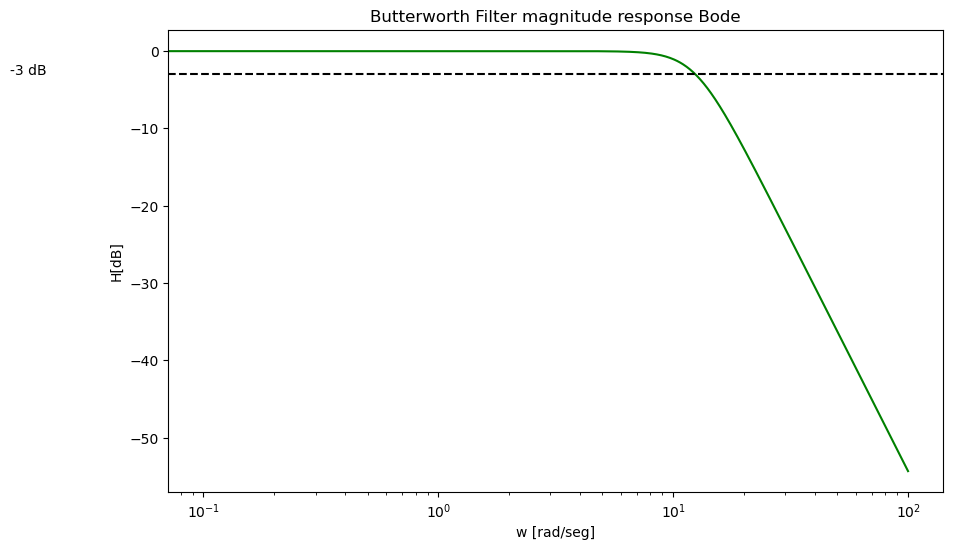

In [18]:
plt.figure(figsize=(10, 6))
plt.title("Butterworth Filter magnitude response Bode")
plt.xscale('log') # cambiamos la escala del eje x para que sea una escala logarítmica, propia de un diagrama de bode
plt.ylabel("H[dB]")
plt.xlabel("w [rad/seg]")
plt.plot(omega, HB, color='green')

# agregamos una linea punteada en -3 dB y la etiquetamos
plt.axhline(y=-3, linestyle='dashed', color='black')
plt.text(0.015, -3, "-3 dB")

# mostramos el gráfico
plt.show()